 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>═══════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 2. Numpy Basis**
# Section 6. Numpy을 활용하여 머신러닝 구현하기 - KNN 분류기

### _Objective_
1. 머신러닝 방법론 중 간단하면서 중요한 방법론인 KNN(K Nearest Neighborhood)에 대해서 배워보고, 이를 Numpy로 구현해 봅니다. <br>


╚════════════════════════════════════════╝

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

# \[ 1. KNN 알고리즘 개괄 \]

---

---

> 분류 항목을 이미 알고 있는 데이터 집합에서 상위 K개의 가장 유사한 데이터를 살펴보고, K개의 가장 유사한 데이터들 중 다수결(majority vote)를 통해 새로운 데이터의 분류 항목을 결정하는 알고리즘입니다.

## 예제 데이터 )  영화 분석 결과



#### 데이터 ) 각 영화 별 싸움 횟수와 키스 횟수

| 영화 제목 | the number of Kick | The number os Kiss | Type |
| ------  | ----| ----| --- |
| 냉정과열정사이 | 3 | 104 | Romance|
| 바람과함께사라지다 | 2 | 100 | Romance |
| 아름다운 여인 | 1 | 81 | Romance |
| 인정사정볼것없다 | 101 | 10 | Action |
| 놈놈놈 | 99 | 5 | Action |
| 화랑 | 98 | 2 | Action |
| 뜨거운 가슴으로 | 25 | 87 | ? |

In [2]:
# 0번째 열 : 킥 횟수, 1번째 열 : 키스 횟수
dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])

labels = np.array(['Romance','Romance','Romance',
          'Action','Action','Action'])

inX = np.array([25, 87])

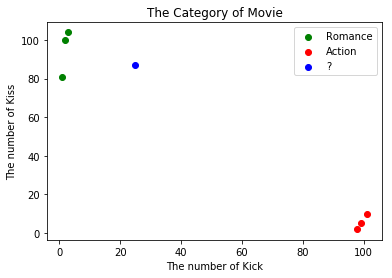

In [3]:
plt.title("The Category of Movie")
plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
            c='g')
plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
            c='r')
plt.scatter(25,87,label="?",
            c='b')


plt.xlabel('The number of Kick')
plt.ylabel('The number of Kiss')
plt.legend()
plt.show()

> "파란 색의 경우는 어느 카테고리에 속할까?" 이 두 가지 특징 "킥 횟수"와 "키스 횟수"로 미루어 판단하건대, Romance에 가까운 작품으로 판단된다. 이를 좀더 정량적으로 판단하면, 자기의 값과 비슷한, 인근 K개(임의의 수, 보통 20개 미만)의 데이터를 뽑아오고, 그 중에서 다수결을 통해 새로운 데이터의 분류 항목을 결정하는 방법을 K-NN이라고 한다. 

# \[ 2. KNN Numpy로 구현 \]

---

---

KNN의 알고리즘 순서


1. 우리가 분류항목을 알고자 하는 점(inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산
2. 오름 차순으로 거리의 길이를 정렬
3. inX와의 거리가 가장 짧은 K개의 아이템 추출
4. K개의 아이템에서 가장 많은 분류 항목 찾기
5. 해당 항목 반환

> KNN의 각 단계별로 코드를 작성해 보자. 

## 1. 각 단계별로 Numpy Code 작성하기

### (1) 우리가 분류항목을 알고자 하는 점 (inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산


거리 공식은 아래와 같습니다. 

우리는 알고자 하는 점(inX)와 알고 있는 점들(dataset) 전부와의 거리를 측정해야 합니다.

$$
point1 = (x_1,y_1), point2 = (x_2,y_2)\mbox{일 때}\\
distance\_between\_point1\_and\_point2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$

In [4]:
dists = []
for point2 in dataset:
    distance = np.sqrt(np.sum((inX-point2)**2))
    dists.append(distance)
dists = np.array(dists)
dists

array([ 27.80287755,  26.41968963,  24.73863375, 108.1896483 ,
       110.45361017, 112.04463396])

위는 영화 "뜨거운 가슴으로"와 다른 데이터 셋과의 거리 차이를 의미합니다.

| 영화 제목 | the number of Kick | The number os Kiss | Type | distance from inX|
| ------  | ----| ----| --- | --- |
| 냉정과열정사이 | 3 | 104 | Romance| 27.8|
| 바람과함께사라지다 | 2 | 100 | Romance | 26.4|
| 아름다운 여인 | 1 | 81 | Romance |24.7|
| 인정사정볼것없다 | 101 | 10 | Action |108.2|
| 놈놈놈 | 99 | 5 | Action |110.5|
| 화랑 | 98 | 2 | Action |112.0|


In [5]:
# broadcasting을 이용하면 보다 간결하고 빠른 코드를 작성할 수 있습니다.
dists = np.sqrt(np.sum((inX-dataset)**2, axis=1))
dists

array([ 27.80287755,  26.41968963,  24.73863375, 108.1896483 ,
       110.45361017, 112.04463396])

numpy로 코드를 짠다는 것은 단순히 코드의 길이가 짧아지는 것 뿐만아니라, 성능에도 지대한 영향을 미칩니다.

In [6]:
%%timeit
dists = []
for point2 in dataset:
    distance = np.sqrt(np.sum((inX-point2)**2))
    dists.append(distance)
dists = np.array(dists)
dists

36.8 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit
dists = np.sqrt(np.sum((inX-dataset)**2, axis=1))
dists

7.39 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


같은 내용이지만, Numpy로 짠 것이 5배나 빠릅니다. 이 때문에, 파이썬에서 빠르고 가독성이 있는 코드를 작성하기 위해서는, 최대한 For구문을 지양하고, Numpy로 코드를 작성해야 합니다.

### (2) 오름 차순으로 거리의 길이를 정렬


In [8]:
# 오름차순으로 정렬된 인덱스 순을 반환
sorted_index = dists.argsort()
sorted_index

array([2, 1, 0, 3, 4, 5])

|인덱스 | 영화 제목 | the number of Kick | The number os Kiss | Type | distance from inX|
|---| ------  | ----| ----| --- | --- |
|0| 냉정과열정사이 | 3 | 104 | Romance| 27.8|
|1| 바람과함께사라지다 | 2 | 100 | Romance | 26.4|
|2| 아름다운 여인 | 1 | 81 | Romance |24.7|
|3| 인정사정볼것없다 | 101 | 10 | Action |108.2|
|4| 놈놈놈 | 99 | 5 | Action |110.5|
|5| 화랑 | 98 | 2 | Action |112.0|


반환된 인덱스 순에 따르면, 

아름다운 여인, 바람과함께사라지다, 냉정과열정사이,인정사정볼것없다,놈놈놈,화랑

순으로 정렬됩니다.

### (3) inX와의 거리가 가장 짧은 K개의 아이템 추출

이번 예제에서는 제일 가까운 4개를 추출해보도록 하겠습니다.

In [9]:
sorted_labels = labels[sorted_index]
K_nearest_labels = sorted_labels[:4]

In [10]:
K_nearest_labels

array(['Romance', 'Romance', 'Romance', 'Action'], dtype='<U7')

### (4) K개의 아이템에서 가장 많은 분류 항목 찾기

In [11]:
# K 개의 아이템에서 각 항목이 몇번씩 등작했는지 count
count_dict = {}
for label in K_nearest_labels:
    if label in count_dict:
        count_dict[label] += 1
    else:
        count_dict[label] = 1

count_dict

{'Romance': 3, 'Action': 1}

In [12]:
# 제일 많이 등장한 횟수를 
max_count = 0
top_label = ""
for key, value in count_dict.items():
    if value > max_count:
        top_label = key
        max_count = value
top_label

'Romance'

numpy를 이용해, 위를 보다 간단하게 작성하면 아래와 같이 작성할 수 있습니다.

In [13]:
_labels, count_labels = np.unique(K_nearest_labels,
          return_counts=True)
_labels, count_labels

(array(['Action', 'Romance'], dtype='<U7'), array([1, 3]))

In [14]:
_labels[count_labels.argmax()]

'Romance'

## 2. 전체 Numpy Code 작성하기

In [15]:
def classify_knn(inX, dataset, labels, K):
    # (1) 우리가 분류항목을 알고자 하는 점 (inX)와 
    # 알고 있는 점들(dataset)과의 모든 점 거리를 계산
    dists = np.sqrt(np.sum((inX-dataset)**2, axis=1))
    
    # (2) 오름 차순으로 거리의 길이를 정렬
    sorted_index = dists.argsort()
    
    # (3) inX와의 거리가 가장짧은 K개의 아이템 추출
    sorted_labels = labels[sorted_index]
    K_nearest_labels = sorted_labels[:K]
    
    # (4) K개의 아이템에서 가장 많은 분류 항목 찾기
    _labels, count_labels = np.unique(K_nearest_labels,
          return_counts=True)
    
    # (5) 해당 항목 반환
    return _labels[count_labels.argmax()]

In [16]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
classify_knn([52, 10], dataset, labels, 4)

'Action'

In [17]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
classify_knn([19, 72], dataset, labels, 4)

'Romance'

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/04

---